Word cloud 는 keywords 를 시각화하여 표현하는 좋은 수단입니다. Python 의 wordcloud package 를 이용하여 KR-WordRank 의 결과를 표현합니다. 

Package, wordcloud 의 사용법은 [여기][wordcloud]를 참고하세요. wordcloud 의 설치는 pip install 이 가능합니다. 

    pip install wordcloud

KR-WordRank 에 관련한 내용과 사용의 자세한 설명은 이 [튜토리얼][krwordrank_tutorial]을 참고하세요. 

[wordcloud]: https://github.com/amueller/word_cloud
[krwordrank_tutorial]: https://github.com/lovit/KR-WordRank/blob/master/tutorials/krwordrank_word_and_keyword_extraction.ipynb

In [1]:
import config
import krwordrank
from krwordrank.word import KRWordRank
from navermovie_comments import load_movie_comments

idxs, texts, rates = load_movie_comments(idxs='134963')
print(krwordrank.__version__)

soynlp=0.0.491
added lovit_textmining_dataset
0.1.3


In [2]:
# train KR-WordRank model
wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 15129
done = 10 Early stopped.


In [3]:
# Check top 30 keywords with corresponding score

for word, r in sorted(keywords.items(), key=lambda x:-x[1])[:30]:
    print('%8s:\t%.4f' % (word, r))

      영화:	230.3272
     관람객:	112.9117
      너무:	78.6762
      음악:	37.7102
      정말:	37.2943
     마지막:	35.1102
      최고:	22.4884
      사랑:	21.1817
     뮤지컬:	20.7810
      꿈을:	19.5622
      보고:	19.4422
     여운이:	19.4412
      아름:	18.6860
      진짜:	18.5991
      영상:	18.1566
      좋았:	17.9096
      노래:	16.9428
     스토리:	16.2458
      좋은:	15.5067
      그냥:	15.2163
      현실:	15.1047
      생각:	14.6701
      인생:	14.2914
      좋고:	13.9802
      지루:	13.9062
      다시:	13.8138
      감동:	13.5138
      느낌:	12.2763
      ㅠㅠ:	12.1908
      좋아:	11.9646


In [4]:
# remove stopwords

stopwords = {'영화', '관람객', '너무', '정말', '보고'}
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}

print('num passwords = {}'.format(len(passwords)))

num passwords = 295


In [5]:
# draw word cloud using generate_from_frequencies()
# You should set font path for Korean.

from wordcloud import WordCloud

# Set your font path
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

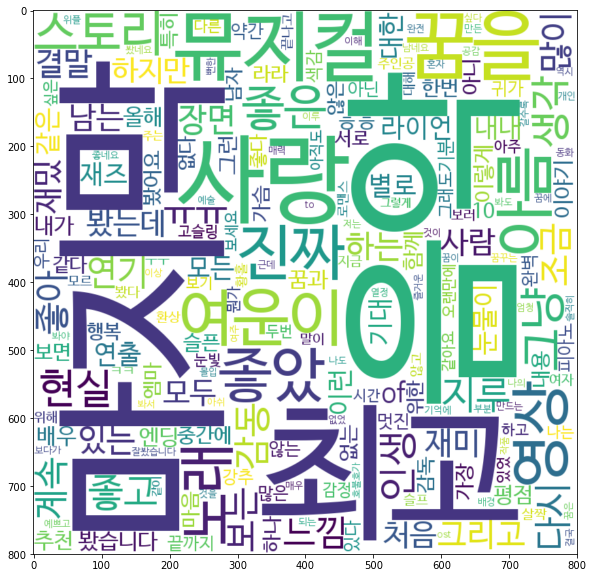

In [6]:
# show figure using matplotlib

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()